In [252]:
import pandas as pd
import numpy as np
import matplotlib, matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [31]:
df=pd.read_csv("./PreK_project.csv")
df.dropna(subset=['Student_ID'], how='all', inplace = True)

In [32]:
# We need to arrange our StudentID from float to int, and then to string
def convertToBetterIndex(df_t):
    strTbl=[]
    for a in df_t:
        strTbl.append(str(int(a)))
    return strTbl
    

In [33]:
df['Student_ID']=convertToBetterIndex(df['Student_ID'].values)
df.set_index('Student_ID', inplace=True)

In [233]:
# As you can see, here we have a duplicate, and this is preventing us to replicate the brochure plot.
# We will deal with this by removing this entry.
df.loc['164658334']

,Pre_No,TVEP Study,Fall_GRTR_Score,Fall_GRTR_Level,Winter_GRTR_Score,Winter_GRTR_Level,Spring_GRTR_Score,Spring_GRTR_Level,Incomplete_IRI,Fall_LNF,...,Spring_LNF,Spring_LNF_Level,Spring_LSF,Spring_LSF_Level,Spring_LNF_Growth,Spring_LSF_Growth,am_pm,teacher,school,cohort
Student_ID,,,,,,,,,,,,,,,,,,,,,
164658334,1.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
164658334,NaN,NaN,14.0,1.0,18.0,2.0,23.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [238]:
# Removing duplicate entries in index
df = df[~df.index.duplicated(keep='first')]

In [239]:
students=['945765668', '577523557','142728168','325383322','514537372','532834342','275522143','236438768',
          '912457324','492575653','286764562','982494857','2358183654','273972562','127648521',
          '834171656','852221239','643655377','872582144','666683785','855745397','989538648','183837445',
          '983366665','164658334','854644586','923951547','853248442','945653567','386148753','672424336',
          '227388697','296549775','618975655','733624274','867823644','823135663']
# The following table contains all students that were part of the program prek
prekst=df.loc[students]

In [240]:
noprk = df.index.isin(students)
# The followint table contains students that were not in the prek program
nonprek=df[~noprk]

In [241]:
def getMean(dataset, indexStr):
    # Remove all Nan in row/index
    dataset.dropna(subset=[indexStr], how='all', inplace = True)
    col=dataset[indexStr]
    return col.mean()

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Result 1</h2>
        <h3 style="font-family:Garamond;">Replicating results from Boise Pre-K Program Evaluation 2017</h3>
        <h4 style="font-family:Garamond;">Page 7</h4>
        <hr/>
    </section>
</body>

In [242]:
print("Fall LSF No Vista Pre-k = ", getMean(nonprek.copy(), 'Fall_LSF'))
print("Fall LSF Vista Pre-k = ", getMean(prekst.copy(), 'Fall_LSF'))
print("Fall LNF No Vista Pre-k = ", getMean(nonprek.copy(), 'Fall_LNF'))
print("Fall LNF Vista Pre-k = ", getMean(prekst.copy(), 'Fall_LNF'))

Fall LSF No Vista Pre-k =  6.3375
Fall LSF Vista Pre-k =  13.409090909090908
Fall LNF No Vista Pre-k =  16.2
Fall LNF Vista Pre-k =  26.363636363636363


In [243]:
print("Winter LSF No Vista Pre-k = ", getMean(nonprek.copy(), 'Winter_LSF'))
print("Winter LSF Vista Pre-k = ", getMean(prekst.copy(), 'Winter_LSF'))
print("Winter LNF No Vista Pre-k = ", getMean(nonprek.copy(), 'Winter_LNF'))
print("Winter LNF Vista Pre-k = ", getMean(prekst.copy(), 'Winter_LNF'))

Winter LSF No Vista Pre-k =  25.22093023255814
Winter LSF Vista Pre-k =  31.347826086956523
Winter LNF No Vista Pre-k =  32.86046511627907
Winter LNF Vista Pre-k =  36.52173913043478


In [244]:
print("Spring LSF No Vista Pre-k = ", getMean(nonprek.copy(), 'Spring_LSF'))
print("Spring LSF Vista Pre-k = ", getMean(prekst.copy(), 'Spring_LSF'))
print("Spring LNF No Vista Pre-k = ", getMean(nonprek.copy(), 'Spring_LNF'))
print("Spring LNF Vista Pre-k = ", getMean(prekst.copy(), 'Spring_LNF'))

Spring LSF No Vista Pre-k =  40.38297872340426
Spring LSF Vista Pre-k =  45.0
Spring LNF No Vista Pre-k =  41.07446808510638
Spring LNF Vista Pre-k =  46.26086956521739


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Result 1</h2>
        <h3 style="font-family:Garamond;">Replicating results from Boise Pre-K Program Evaluation 2017</h3>
        <h4 style="font-family:Garamond;">Page 9</h4>
        <hr/>
    </section>
</body>

In [245]:
# We need to arrange our StudentID from float to int, and then to string
def convertToInt(df_t):
    strTbl=[]
    for a in df_t:
        strTbl.append(int(a))
    return strTbl
    

In [246]:
def getListValues(dataset, firstSelector, secondSelector):
    tbl = dataset.reset_index()
    data = tbl.groupby([firstSelector])[[secondSelector]].count()
    data = data.reset_index()
    data['firstSelector']=convertToInt(data[firstSelector].values)
    return list(data[secondSelector])

In [248]:
def getBelowAverages(dataset):
    tbl = dataset.reset_index()
    data = tbl.groupby(['Fall_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Fall_GRTR_Level']=convertToInt(data['Fall_GRTR_Level'].values)
    fall = (list(data['Student_ID']))[0]
    
    data = tbl.groupby(['Winter_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Winter_GRTR_Level']=convertToInt(data['Winter_GRTR_Level'].values)
    winter = (list(data['Student_ID']))[0]
    
    data = tbl.groupby(['Spring_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Spring_GRTR_Level']=convertToInt(data['Spring_GRTR_Level'].values)
    spring = (list(data['Student_ID']))[0]
    
    return [fall, winter, spring]
def getAverages(dataset):
    tbl = dataset.reset_index()
    data = tbl.groupby(['Fall_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Fall_GRTR_Level']=convertToInt(data['Fall_GRTR_Level'].values)
    fall = (list(data['Student_ID']))[1]
    
    data = tbl.groupby(['Winter_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Winter_GRTR_Level']=convertToInt(data['Winter_GRTR_Level'].values)
    winter = (list(data['Student_ID']))[1]
    
    data = tbl.groupby(['Spring_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Spring_GRTR_Level']=convertToInt(data['Spring_GRTR_Level'].values)
    spring = (list(data['Student_ID']))[1]
    
    return [fall, winter, spring]
def getAboveAverages(dataset):
    tbl = dataset.reset_index()
    data = tbl.groupby(['Fall_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Fall_GRTR_Level']=convertToInt(data['Fall_GRTR_Level'].values)
    fall = (list(data['Student_ID']))[2]
    
    data = tbl.groupby(['Winter_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Winter_GRTR_Level']=convertToInt(data['Winter_GRTR_Level'].values)
    winter = (list(data['Student_ID']))[2]
    
    data = tbl.groupby(['Spring_GRTR_Level'])[['Student_ID']].count()
    data = data.reset_index()
    data['Spring_GRTR_Level']=convertToInt(data['Spring_GRTR_Level'].values)
    spring = (list(data['Student_ID']))[2]
    
    return [fall, winter, spring]

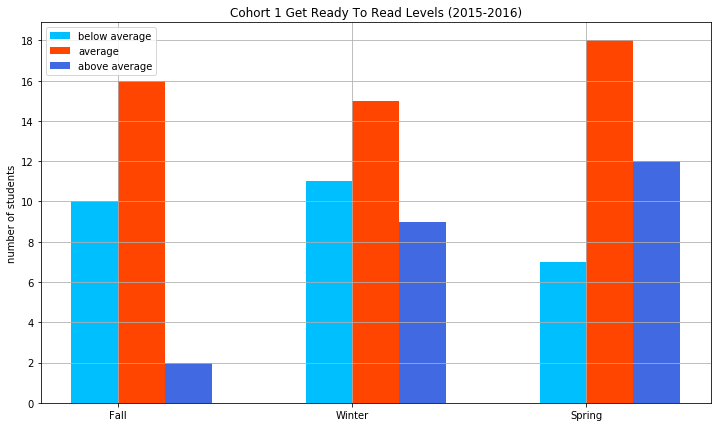

In [257]:
fig, ax = plt.subplots(figsize=(12, 7))
N = 3 #Number of groups
width = 0.40         # the width of the bars
ind = np.arange(N)    # the x locations for the groups

x=[0, 2, 4]
fall = getListValues(prekst.copy(), 'Fall_GRTR_Level','Student_ID')

ba = getBelowAverages(prekst.copy())
av = getAverages(prekst.copy())
aa = getAboveAverages(prekst.copy())

#ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

p1 = ax.bar(x,ba, width, color='deepskyblue', bottom=0)
p2 = ax.bar(ind*2 + width , av, width,color='orangered')
p3 = ax.bar(ind*2 + width*2, aa, width,color='royalblue')

ax.set_title('Cohort 1 Get Ready To Read Levels (2015-2016)')
ax.set_xticks((ind*2) + width/2)
ax.set_xticklabels(('Fall', 'Winter', 'Spring'))
ax.set_ylabel('number of students')

ax.grid(True)
ax.legend((p1[0], p2[0], p3[0]), ('below average', 'average', 'above average'),loc='upper left')
ax.autoscale_view()
plt.show()